In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pickle
from deap import base
from deap import creator
import os

In [2]:
# Create classes
creator.create("FitnessMax", base.Fitness, weights=(1.0, 1.0, 1.0))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMax)

In [3]:
root = './deap_stats_object_results/'
file_list = []
for i in range(11):
    file = root + 'deap_stats_object_' + str(i)
    file_list.append(file)

In [4]:
def get_pickle_object(file_path: str):
    file = open(file_path,'rb')
    object_file = pickle.load(file)
    return object_file

In [25]:
def get_run_stats(data: dict(), my_dict: dict(), run: int = 0)->dict():
    for key, value in data.items():
        avg_fit_gen = tuple((0, 0, 0))
        max_fit_gen = tuple((0, 0, 0))
        if type(key) == int:
            for individual in value:
                fitness = individual.fitness.values
                avg_fit_gen = tuple(sum(x) for x in zip(avg_fit_gen, fitness))
                max_fit_gen = tuple(max(x) for x in zip(max_fit_gen, fitness))
            avg_fit_gen = tuple([x / 100 for x in avg_fit_gen])
            # store statistics of run
            if key == 0:
                my_dict[run] = dict()
                my_dict[run]['avg_x1'] = [avg_fit_gen[0]]
                my_dict[run]['avg_x2'] = [avg_fit_gen[1]]
                my_dict[run]['avg_x3'] = [avg_fit_gen[2]]
                my_dict[run]['max_x1'] = [max_fit_gen[0]]
                my_dict[run]['max_x2'] = [max_fit_gen[1]]
                my_dict[run]['max_x3'] = [max_fit_gen[2]]
            else:
                my_dict[run]['avg_x1'].append(avg_fit_gen[0])
                my_dict[run]['avg_x2'].append(avg_fit_gen[1])
                my_dict[run]['avg_x3'].append(avg_fit_gen[2])
                my_dict[run]['max_x1'].append(max_fit_gen[0])
                my_dict[run]['max_x2'].append(max_fit_gen[1])
                my_dict[run]['max_x3'].append(max_fit_gen[2])
    return my_dict

In [37]:
def get_gen_stats(data: dict(), my_dict: dict(), run = 0) -> dict():
    for key, value in data.items():
        avg_fit_gen = tuple((0, 0, 0))
        max_fit_gen = tuple((0, 0, 0))
        if type(key) == int:
            for individual in value:
                fitness = individual.fitness.values
                avg_fit_gen = tuple(sum(x) for x in zip(avg_fit_gen, fitness))
                max_fit_gen = tuple(max(x) for x in zip(max_fit_gen, fitness))
            avg_fit_gen = tuple([x / 100 for x in avg_fit_gen])
            # store statistics of generation
            if run == 0:
                my_dict[key] = dict()
            if not my_dict[key]:
                my_dict[key]['avg_x1'] = [avg_fit_gen[0]]
                my_dict[key]['avg_x2'] = [avg_fit_gen[1]]
                my_dict[key]['avg_x3'] = [avg_fit_gen[2]]
                my_dict[key]['max_x1'] = [max_fit_gen[0]]
                my_dict[key]['max_x2'] = [max_fit_gen[1]]
                my_dict[key]['max_x3'] = [max_fit_gen[2]]
            else:
                my_dict[key]['avg_x1'].append(avg_fit_gen[0])
                my_dict[key]['avg_x2'].append(avg_fit_gen[1])
                my_dict[key]['avg_x3'].append(avg_fit_gen[2])
                my_dict[key]['max_x1'].append(max_fit_gen[0])
                my_dict[key]['max_x2'].append(max_fit_gen[1])
                my_dict[key]['max_x3'].append(max_fit_gen[2])
    return my_dict

In [39]:
run_dict = dict()
gen_dict = dict()
run = 0
for file in file_list:
    data = get_pickle_object(file)
    run_dict = get_run_stats(data, run_dict, run)
    gen_dict = get_gen_stats(data, gen_dict, run)
    run += 1

(17.420920690157065, -11.142265891559834, -1.2422658915598441)
(18.072076889738497, -11.489914152315237, -0.9899141523152453)


In [41]:
def get_average_stats(run_dict: dict(), gen_dict: dict()) -> np.array:
    average_x1 = [0] * 800
    average_x2 = [0] * 800
    average_x3 = [0] * 800
    max_x1 = [0] * 800
    max_x2 = [0] * 800
    max_x3 = [0] * 800

    # calculate average of averages and average max values
    for key, value in run_dict.items():
        average_x1 = [x + y for x, y in zip(average_x1, value['avg_x1'])]
        average_x2 = [x + y for x, y in zip(average_x2, value['avg_x2'])]
        average_x3 = [x + y for x, y in zip(average_x3, value['avg_x3'])]
        max_x1 = [x + y for x, y in zip(max_x1, value['max_x1'])]
        max_x2 = [x + y for x, y in zip(max_x2, value['max_x2'])]
        max_x3 = [x + y for x, y in zip(max_x3, value['max_x3'])]
    avg_x1 = np.array([x / len(file_list) for x in average_x1])
    avg_x2 = np.array([x / len(file_list) for x in average_x2])
    avg_x3 = np.array([x / len(file_list) for x in average_x3])
    avg_max_x1 = np.array([x / len(file_list) for x in max_x1])
    avg_max_x2 = np.array([x / len(file_list) for x in max_x2])
    avg_max_x3 = np.array([x / len(file_list) for x in max_x3])

    # calculate standard deviation of averages and max values
    std_avg_x1 = []
    std_avg_x2 = []
    std_avg_x3 = []
    std_max_x1 = []
    std_max_x2 = []
    std_max_x3 = []
    for key, value in gen_dict.items():
        x1_avg_std = np.std(value['avg_x1'])
        x2_avg_std = np.std(value['avg_x2'])
        x3_avg_std = np.std(value['avg_x3'])
        x1_max_std = np.std(value['max_x1'])
        x2_max_std = np.std(value['max_x2'])
        x3_max_std = np.std(value['max_x3'])
        std_avg_x1.append(x1_avg_std)
        std_avg_x2.append(x2_avg_std)
        std_avg_x3.append(x3_avg_std)
        std_max_x1.append(x1_max_std)
        std_max_x2.append(x2_max_std)
        std_max_x3.append(x3_max_std)

    # store values in dictionary
    my_dict = dict()
    my_dict['avg_x1'] = avg_x1
    my_dict['avg_x2'] = avg_x2
    my_dict['avg_x3'] = avg_x3
    my_dict['avg_max_x1'] = avg_max_x1
    my_dict['avg_max_x2'] = avg_max_x2
    my_dict['avg_max_x3'] = avg_max_x3
    my_dict['std_avg_x1'] = std_avg_x1
    my_dict['std_avg_x2'] = std_avg_x2
    my_dict['std_avg_x3'] = std_avg_x3
    my_dict['std_max_x1'] = std_max_x1
    my_dict['std_max_x2'] = std_max_x2
    my_dict['std_max_x3'] = std_max_x3
    return my_dict

In [42]:
average_stats = get_average_stats(run_dict, gen_dict)

In [62]:
def plot_stats(stats, title, file_dir=None, file_name='', x=1):
    generation = range(150)
    max_fit_x1 = np.array(stats['avg_max_x1'])[:150]
    max_fit_x2 = np.array(stats['avg_max_x2'])[:150]
    max_fit_x3 = np.array(stats['avg_max_x3'])[:150]
    std_max_x1 = np.array(stats['std_max_x1'])[:150]
    std_max_x2 = np.array(stats['std_max_x2'])[:150]
    std_max_x3 = np.array(stats['std_max_x3'])[:150]
    avg_fit_x1 = np.array(stats['avg_x1'])[:150]
    avg_fit_x2 = np.array(stats['avg_x2'])[:150]
    avg_fit_x3 = np.array(stats['avg_x3'])[:150]
    std_avg_x1 = np.array(stats['std_avg_x1'])[:150]
    std_avg_x2 = np.array(stats['std_avg_x2'])[:150]
    std_avg_x3 = np.array(stats['std_avg_x3'])[:150]

    if x == 1:
        plt.plot(generation, max_fit_x1, 'r-', label="mean_max_x1")
        plt.fill_between(generation, max_fit_x1-std_max_x1, max_fit_x1+std_max_x1, edgecolor='#CC4F1B', facecolor='#FF9848')
        plt.plot(generation, avg_fit_x1, 'b-.', label="mean_avg_x1")
        plt.fill_between(generation, avg_fit_x1-std_avg_x1, avg_fit_x1+std_avg_x1, edgecolor='#1B2ACC', facecolor='#089FFF')

    elif x == 2:
        plt.plot(generation, max_fit_x2, 'r-', label="mean_max_x2")
        plt.fill_between(generation, max_fit_x2-std_max_x2, max_fit_x2+std_max_x2, edgecolor='#CC4F1B', facecolor='#FF9848')
        plt.plot(generation, avg_fit_x2, 'b-.', label="mean_avg_x2")
        plt.fill_between(generation, avg_fit_x2-std_avg_x2, avg_fit_x2+std_avg_x2, edgecolor='#1B2ACC', facecolor='#089FFF')
    
    elif x == 3:
        plt.plot(generation, max_fit_x3, 'r-', label="mean_max_x3")
        plt.fill_between(generation, max_fit_x3-std_max_x3, max_fit_x3+std_max_x3, edgecolor='#CC4F1B', facecolor='#FF9848')
        plt.plot(generation, avg_fit_x3, 'b-.', label="mean_avg_x3")
        plt.fill_between(generation, avg_fit_x3-std_avg_x3, avg_fit_x3+std_avg_x3, edgecolor='#1B2ACC', facecolor='#089FFF')
    else:
        return 'Please provide an integer for x between 1 and 3.'

    plt.title(title)
    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.grid()
    plt.legend(loc='best')
    if not os.path.exists(file_dir):
        os.makedirs(file_dir)
    plt.savefig(file_dir + file_name)
    plt.show()
    plt.close()

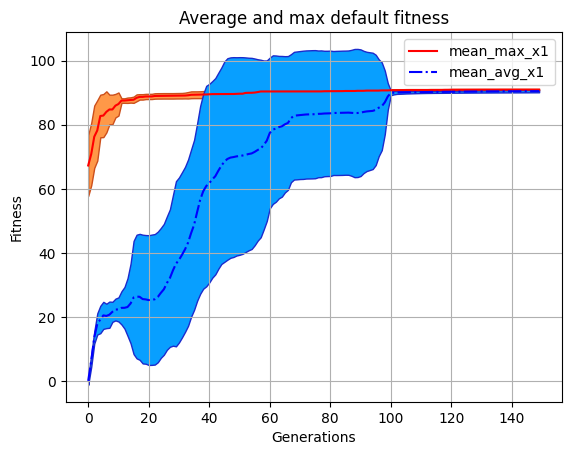

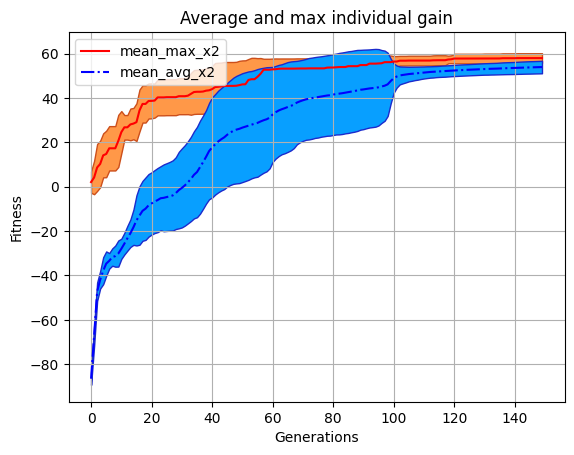

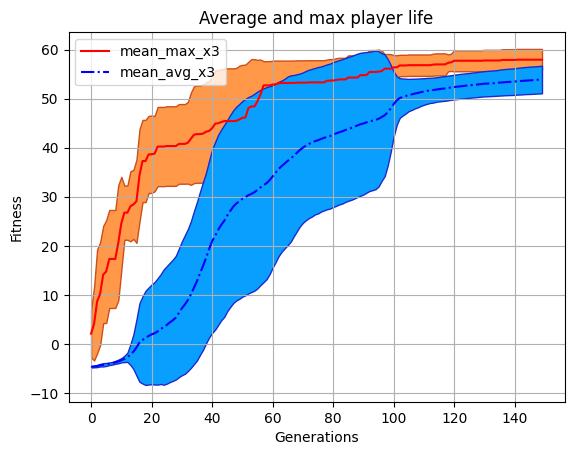

In [63]:
experiment_name = 'deap_multi_objective'
OUTPUT_DIR = './' + experiment_name + '/'

fitness = ['Average and max default fitness', 'Average and max individual gain', 'Average and max player life']
output_names = ['default.png', 'individual_gain.png', 'player_life.png']
x=1
for name, output in zip(fitness, output_names):
    plot_fig = plot_stats(average_stats, name, file_dir=OUTPUT_DIR, file_name=output, x=x)
    x += 1

In [ ]:
            # avg_fit_gen = tuple(0, 0, 0)
            # max_fit_gen = tuple(0, 0, 0)
            # avg_fit_gen = tuple(sum(x) for x in zip(avg_fit_gen, fitness))
            # max_fit_gen = tuple(max(x) for x in zip(max_fit_gen, fitness))
            # avg_fit_gen = tuple([x / 100 for x in avg_fit_gen])
            # avg_fit_total.append(avg_fit_gen)